In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from APE import APE
from data_processing import data_processing
%matplotlib inline

In [2]:
df = pd.read_csv('test.csv')
feature_matrix = np.zeros((383,6))
y = np.array([])
features = df.iloc[0:383].values
for i in range(383):
    feature_matrix[i][0] = features[i][4]
    feature_matrix[i][1] = features[i][9]
    feature_matrix[i][2] = features[i][10]
    feature_matrix[i][3] = features[i][11]
    feature_matrix[i][4] = features[i][12]
    feature_matrix[i][5] = features[i][14]
    y = np.append(y,features[i][17])
x_bar = np.mean(feature_matrix,axis=0)
x_std = np.std(feature_matrix,axis=0)
y_bar = np.mean(y)
y_std = np.std(y)
#normalize
feature_matrix = (feature_matrix-x_bar)/x_std
y = (y - y_bar)/y_std
val_x = feature_matrix[30]
val_x = val_x.reshape(1,6)
val_y = np.array([y[30]])
feature_matrix = np.delete(feature_matrix,30,axis=0)
y = np.delete(y,30)

In [3]:
sigmoid = lambda x:1/(1+np.exp(-x))
network = APE(sigmoid(feature_matrix),sigmoid(y),val_x=sigmoid(val_x),val_y=sigmoid(val_y),hidden_activation='elu',output_activation='sigmoid')

In [4]:
optimal_archs = network.arch_optimizer(max_layers=5,max_neurons=6)

Instructions for updating:
Colocations handled automatically by placer.


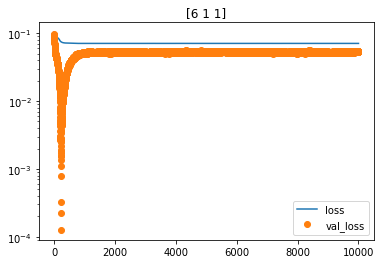

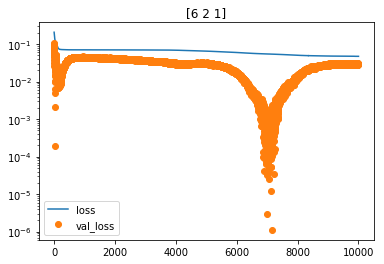

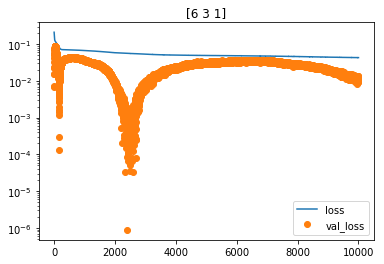

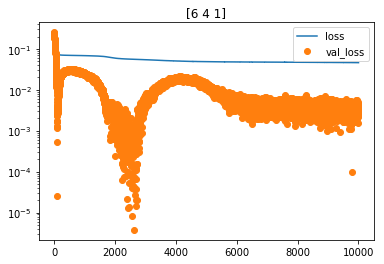

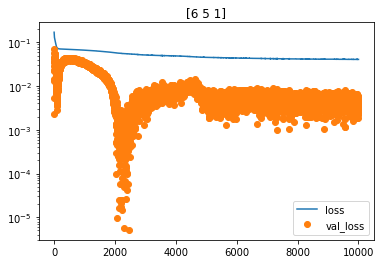

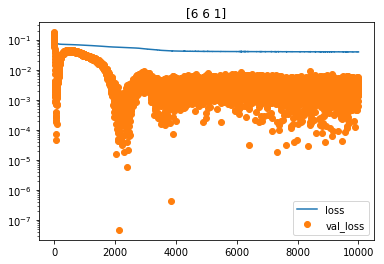

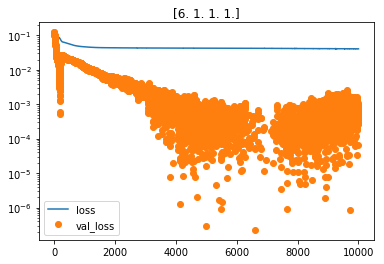

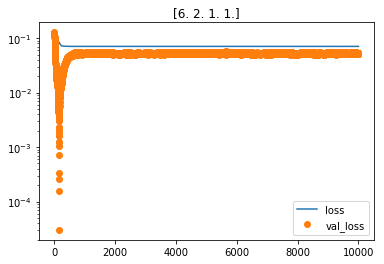

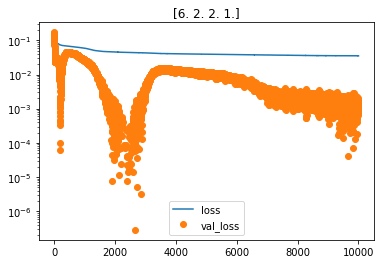

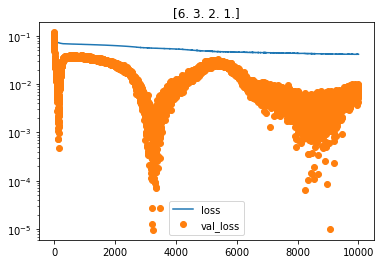

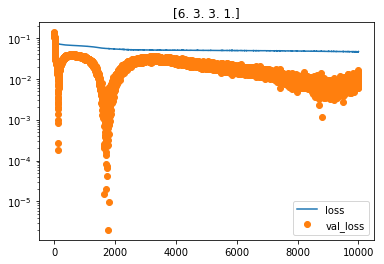

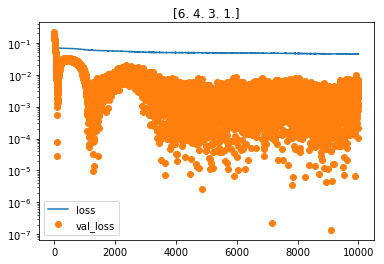

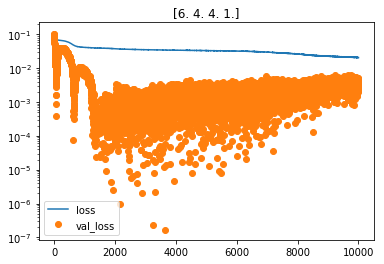

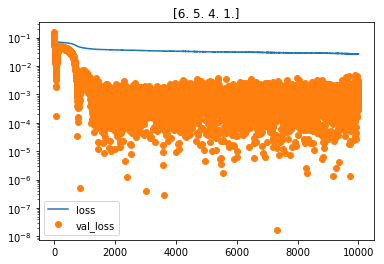

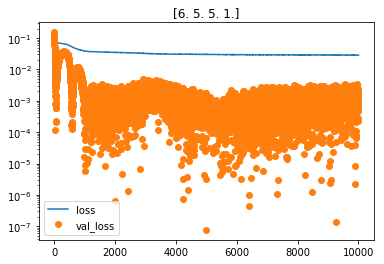

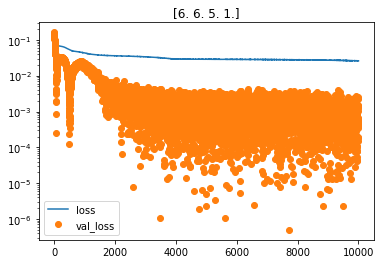

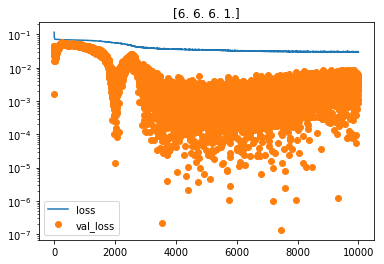

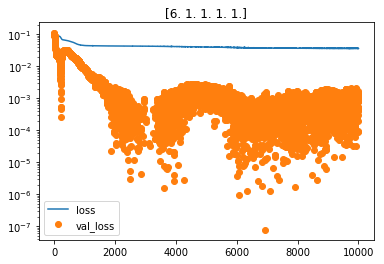

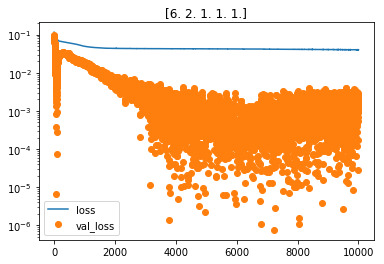

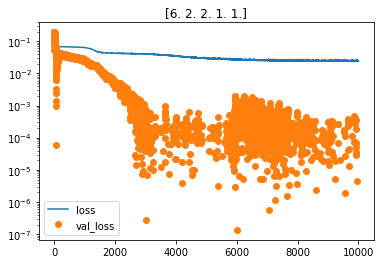

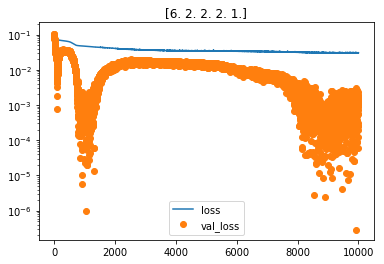

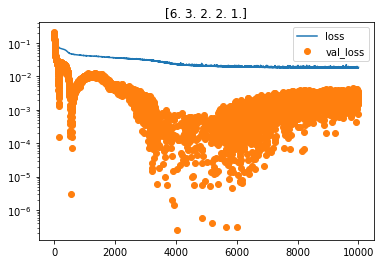

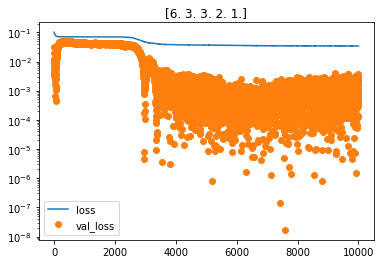

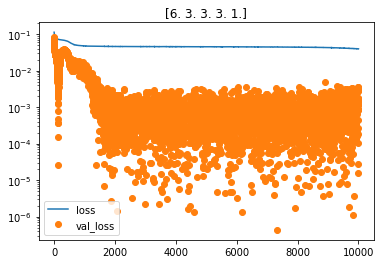

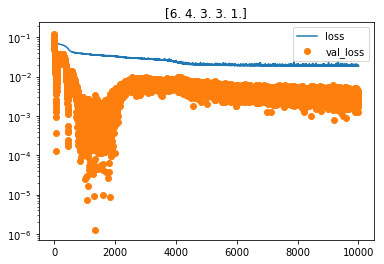

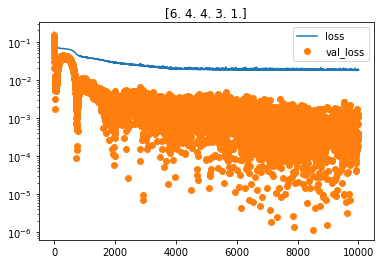

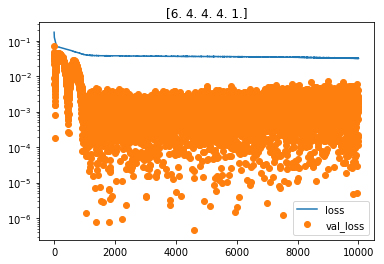

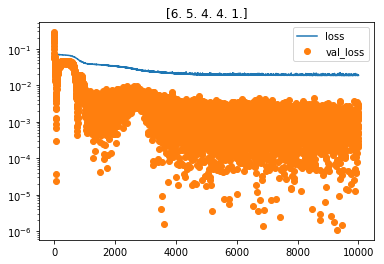

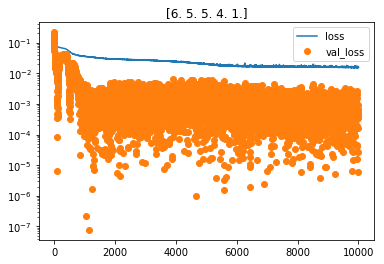

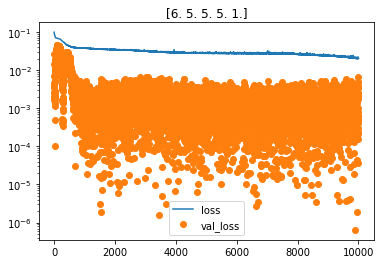

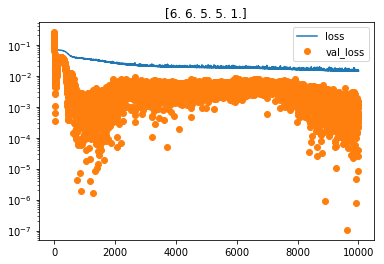

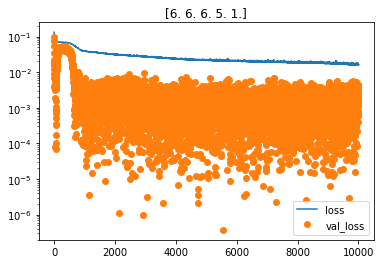

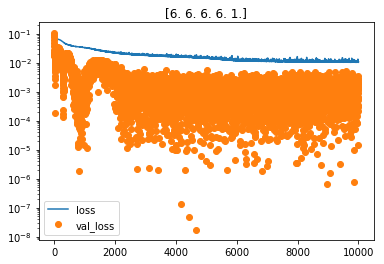

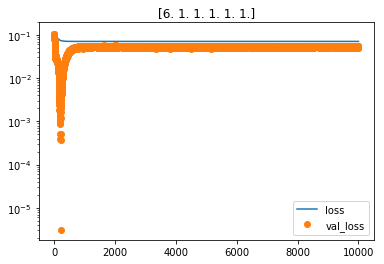

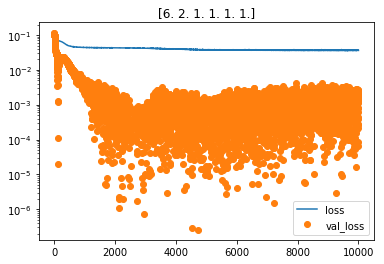

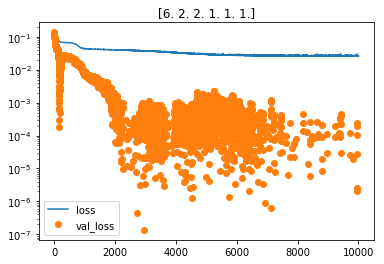

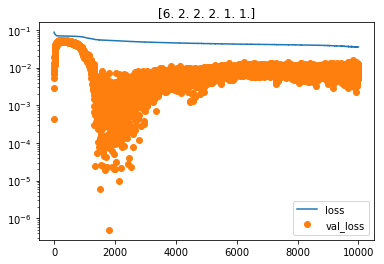

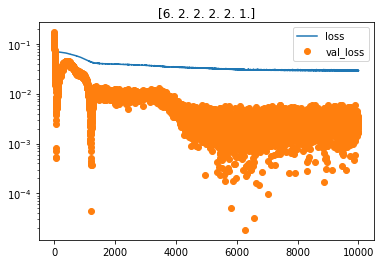

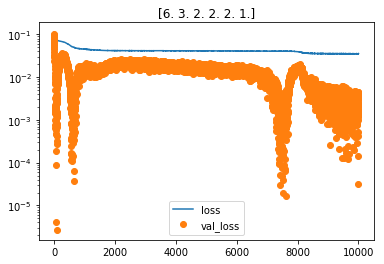

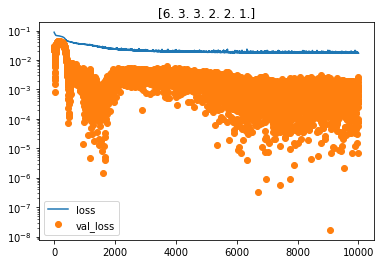

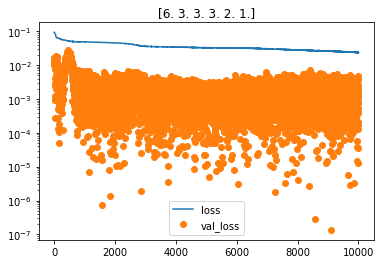

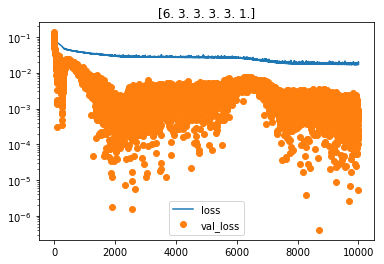

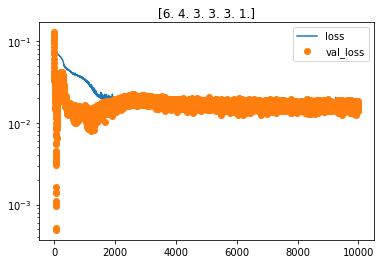

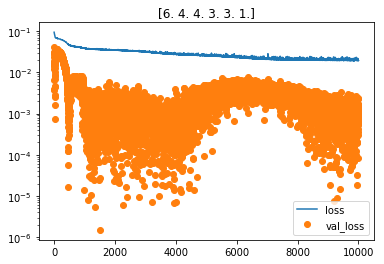

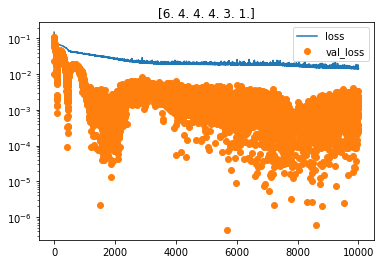

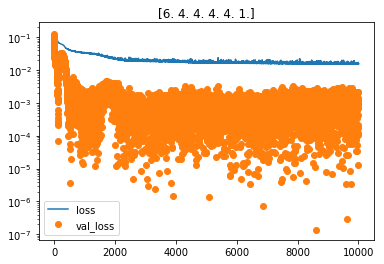

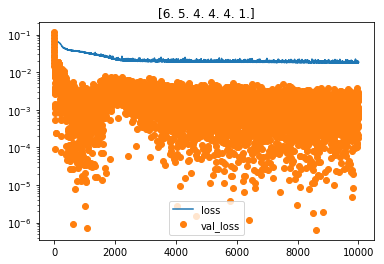

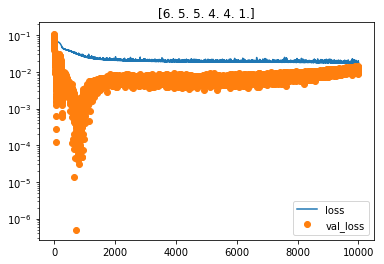

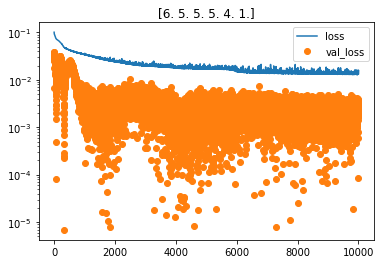

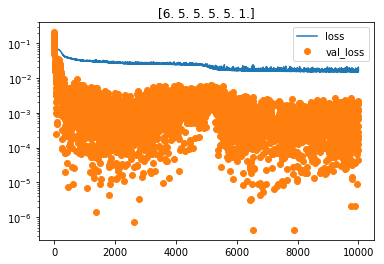

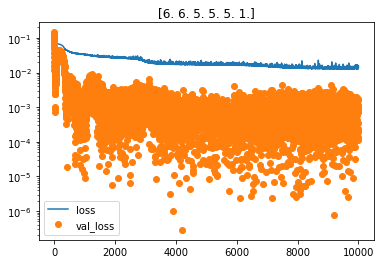

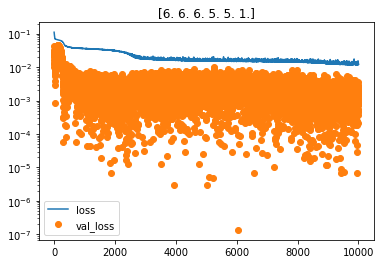

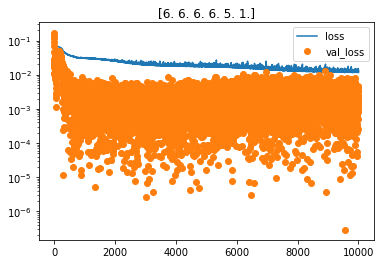

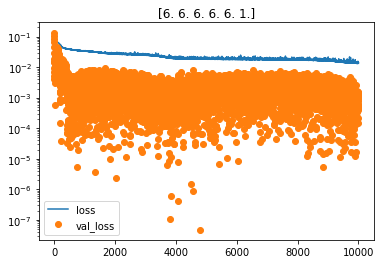

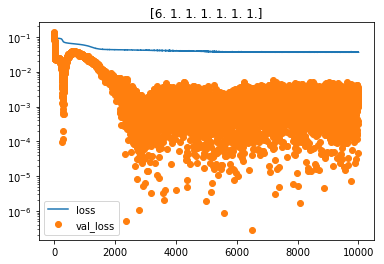

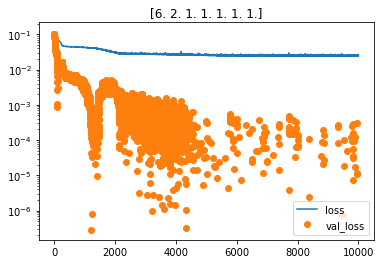

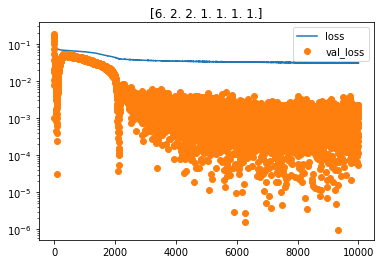

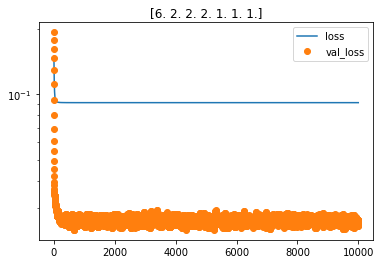

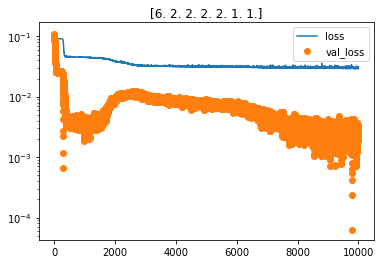

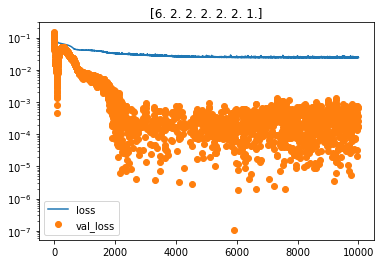

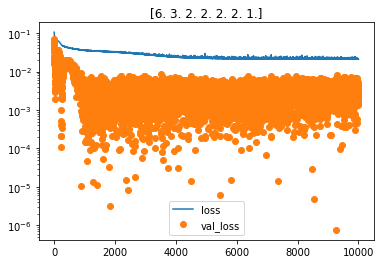

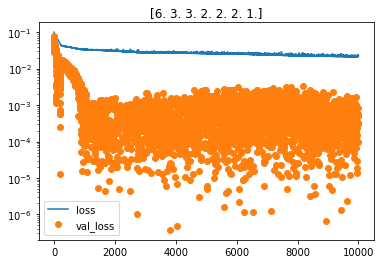

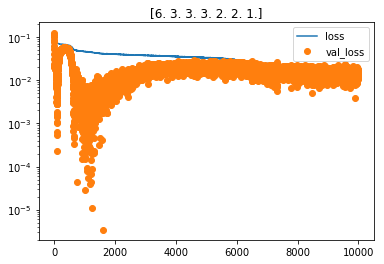

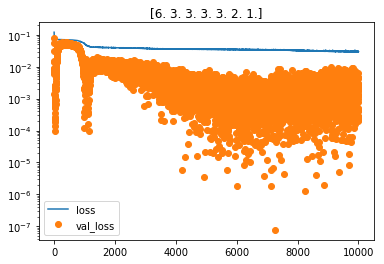

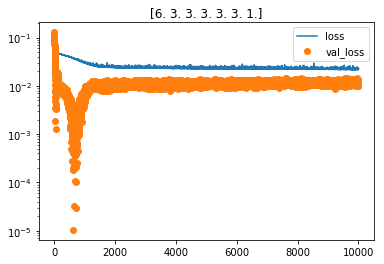

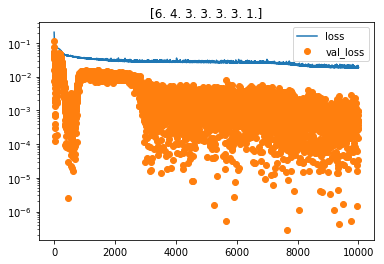

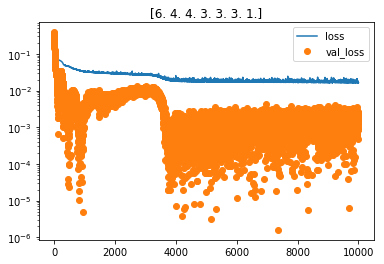

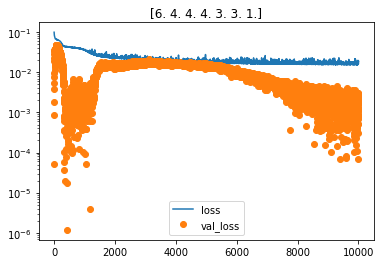

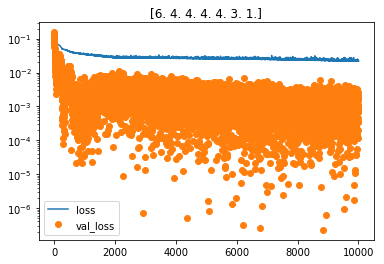

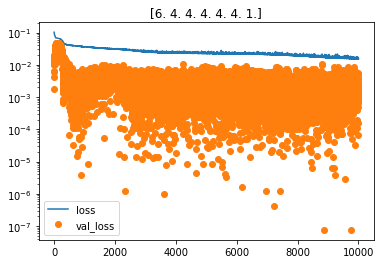

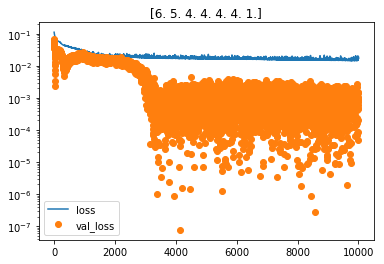

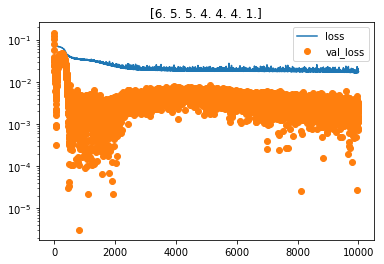

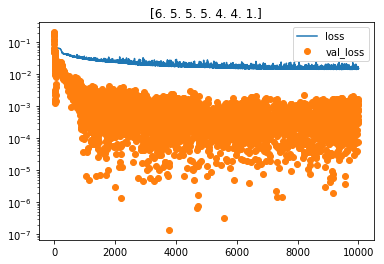

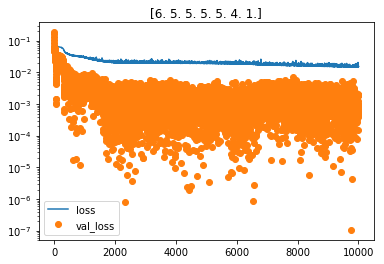

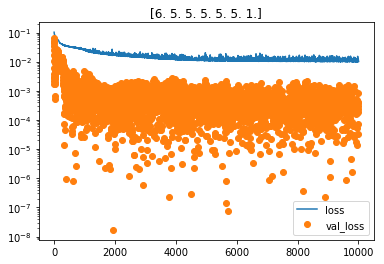

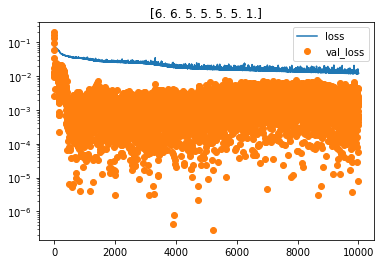

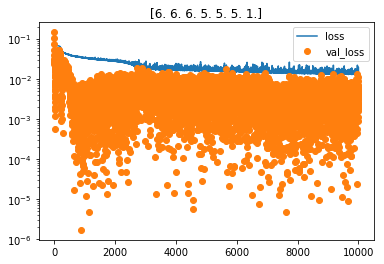

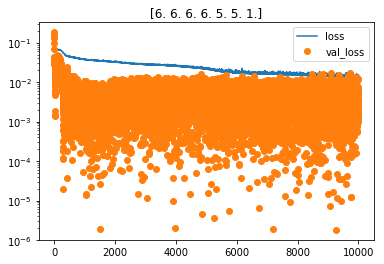

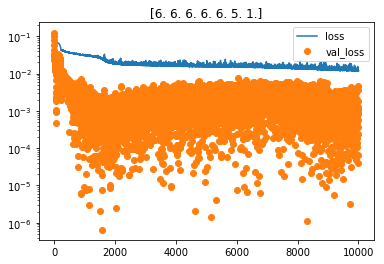

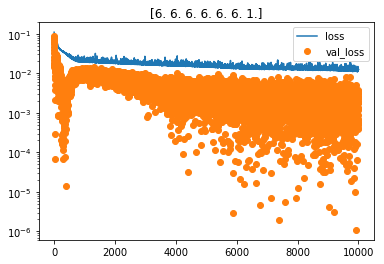

KeyError: 80

In [5]:
for i in range(100):
    x = np.linspace(1,np.size(optimal_archs['history'][i].history['loss']),np.size(optimal_archs['history'][i].history['loss']))
    plt.semilogy(x,optimal_archs['history'][i].history['loss'],label='loss')
    plt.semilogy(x,optimal_archs['history'][i].history['val_loss'],'o',label='val_loss')
    plt.legend(loc='best')
    plt.title(str(optimal_archs['grid_struct'][i]))
    plt.show()